# Anexo 7: Validación de los módulos de firmware current_sensor y signal_analyzer

Para verfificar el correcto funcionamiento del módulo, en primer lugar se va  a acceder a las variables almacenadas en memoria del mcirocontrolador para analizar si las señales que está procesando son realmente correctas.

## Módulos necesarios

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Módulo de Firmware Current Sensor
En primer lugar, se verificará la correcta adquisición de la señal de corriente. Para lo cual, hay que cheuqear:
- El vector leído por el ADC
- El procesamiento para obtener un ciclo representativo (ya que la señal es periódica)

### Lectura de ADC

En primer lugar se lee la señal del ADC que como puede verse es una señal muy ruidosa. Se muestran los primeros 5 ciclos pero en verdad el array tiene aproximadamente 100.

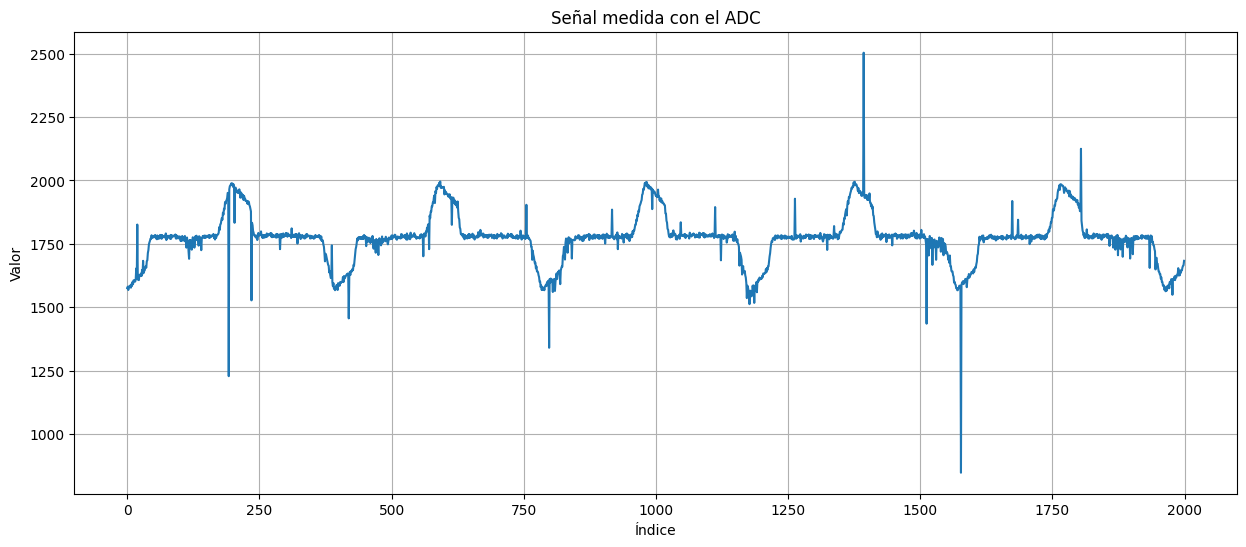

In [170]:
# Datos
array1 = [1575, 1581, 1568, 1581, 1579, 1585, 1583, 1577, 1591, 1584, 1600, 1591, 1606, 1602, 1606, 1601, 1609, 1653, 1611, 1826, 1609, 1619, 1607, 1628, 1623, 1625, 1633, 1623, 1647, 1632, 1683, 1635, 1644, 1645, 1655, 1662, 1656, 1682, 1685, 1714, 1725, 1748, 1756, 1762, 1771, 1770, 1784, 1774, 1781, 1775, 1779, 1782, 1779, 1785, 1772, 1777, 1768, 1783, 1769, 1780, 1777, 1771, 1785, 1773, 1785, 1770, 1785, 1777, 1779, 1779, 1775, 1782, 1779, 1791, 1765, 1779, 1772, 1782, 1777, 1775, 1779, 1770, 1785, 1770, 1785, 1779, 1781, 1779, 1780, 1784, 1780, 1787, 1771, 1784, 1771, 1779, 1779, 1779, 1771, 1779]
array2 = [1778, 1761, 1768, 1761, 1781, 1771, 1777, 1763, 1766, 1781, 1759, 1773, 1735, 1775, 1759, 1759, 1719, 1691, 1765, 1751, 1764, 1749, 1727, 1763, 1776, 1768, 1767, 1735, 1757, 1780, 1767, 1782, 1769, 1763, 1769, 1743, 1780, 1764, 1775, 1767, 1725, 1771, 1776, 1781, 1775, 1782, 1773, 1783, 1774, 1775, 1778, 1782, 1779, 1777, 1784, 1773, 1785, 1775, 1781, 1779, 1781, 1785, 1781, 1789, 1773, 1779, 1767, 1786, 1773, 1781, 1783, 1787, 1788, 1794, 1816, 1805, 1827, 1829, 1843, 1852, 1845, 1873, 1865, 1889, 1886, 1915, 1908, 1919, 1923, 1931, 1951, 1950, 1228, 1965, 1977, 1981, 1983, 1989, 1982, 1988]
array3 = [1975, 1985, 1973, 1833, 1969, 1972, 1965, 1954, 1958, 1951, 1961, 1951, 1965, 1949, 1932, 1953, 1949, 1947, 1931, 1943, 1923, 1939, 1928, 1928, 1919, 1919, 1920, 1909, 1919, 1907, 1916, 1903, 1898, 1887, 1878, 1527, 1833, 1823, 1801, 1794, 1783, 1784, 1783, 1775, 1783, 1777, 1765, 1775, 1793, 1781, 1785, 1785, 1785, 1799, 1782, 1779, 1773, 1785, 1775, 1785, 1775, 1777, 1785, 1777, 1791, 1779, 1789, 1784, 1786, 1787, 1784, 1793, 1779, 1791, 1776, 1785, 1777, 1785, 1781, 1779, 1781, 1775, 1789, 1775, 1789, 1779, 1783, 1779, 1787, 1729, 1775, 1789, 1773, 1787, 1778, 1791, 1777, 1779, 1783, 1783]
array4 = [1793, 1781, 1791, 1778, 1791, 1783, 1786, 1785, 1780, 1785, 1773, 1811, 1777, 1787, 1777, 1784, 1783, 1777, 1789, 1777, 1789, 1782, 1751, 1779, 1787, 1792, 1777, 1785, 1769, 1782, 1773, 1785, 1781, 1778, 1779, 1771, 1782, 1772, 1787, 1777, 1789, 1779, 1783, 1782, 1780, 1782, 1771, 1782, 1772, 1781, 1776, 1778, 1773, 1770, 1781, 1773, 1785, 1777, 1781, 1777, 1781, 1782, 1777, 1785, 1773, 1781, 1767, 1779, 1761, 1765, 1763, 1747, 1739, 1714, 1681, 1711, 1707, 1697, 1689, 1677, 1667, 1664, 1637, 1643, 1627, 1615, 1617, 1744, 1599, 1583, 1595, 1573, 1576, 1567, 1579, 1571, 1588, 1580, 1568, 1595]
array5 = [1585, 1590, 1585, 1600, 1595, 1599, 1600, 1602, 1619, 1599, 1623, 1613, 1617, 1621, 1625, 1629, 1627, 1633, 1623, 1456, 1621, 1639, 1627, 1643, 1641, 1641, 1651, 1646, 1667, 1664, 1685, 1702, 1729, 1738, 1752, 1771, 1763, 1775, 1771, 1777, 1770, 1777, 1771, 1769, 1777, 1771, 1781, 1769, 1785, 1775, 1781, 1775, 1741, 1777, 1759, 1762, 1759, 1774, 1760, 1769, 1753, 1761, 1774, 1759, 1781, 1749, 1731, 1765, 1764, 1753, 1715, 1769, 1750, 1765, 1743, 1706, 1755, 1772, 1759, 1757, 1744, 1754, 1779, 1755, 1769, 1769, 1766, 1768, 1760, 1778, 1769, 1771, 1757, 1748, 1761, 1775, 1771, 1768, 1775, 1770]
array6 = [1783, 1769, 1783, 1775, 1781, 1777, 1786, 1785, 1771, 1777, 1766, 1779, 1774, 1778, 1772, 1775, 1774, 1771, 1788, 1773, 1787, 1777, 1778, 1781, 1775, 1785, 1773, 1785, 1767, 1791, 1767, 1783, 1777, 1782, 1773, 1768, 1794, 1775, 1781, 1779, 1783, 1779, 1787, 1792, 1777, 1783, 1777, 1770, 1775, 1777, 1775, 1775, 1775, 1771, 1785, 1774, 1788, 1777, 1783, 1777, 1701, 1790, 1783, 1791, 1779, 1799, 1795, 1813, 1812, 1826, 1828, 1729, 1861, 1851, 1877, 1877, 1898, 1898, 1913, 1913, 1933, 1941, 1911, 1958, 1950, 1974, 1967, 1980, 1981, 1979, 1991, 1978, 1996, 1971, 1976, 1971, 1973, 1973, 1971, 1975]
array7 = [1945, 1961, 1947, 1954, 1949, 1947, 1944, 1937, 1945, 1935, 1945, 1929, 1935, 1929, 1825, 1933, 1927, 1932, 1911, 1923, 1906, 1917, 1903, 1903, 1893, 1917, 1879, 1853, 1847, 1815, 1809, 1789, 1789, 1783, 1785, 1789, 1775, 1786, 1768, 1785, 1777, 1779, 1777, 1771, 1783, 1773, 1789, 1773, 1787, 1775, 1782, 1779, 1784, 1790, 1774, 1786, 1774, 1767, 1775, 1779, 1775, 1775, 1783, 1775, 1796, 1778, 1789, 1781, 1805, 1785, 1786, 1784, 1781, 1791, 1775, 1787, 1777, 1785, 1779, 1779, 1785, 1774, 1784, 1774, 1786, 1780, 1786, 1781, 1783, 1787, 1773, 1781, 1777, 1785, 1771, 1785, 1777, 1775, 1779, 1771]
array8 = [1789, 1778, 1785, 1779, 1781, 1785, 1780, 1792, 1779, 1788, 1771, 1782, 1781, 1783, 1775, 1774, 1777, 1776, 1783, 1773, 1790, 1779, 1784, 1782, 1782, 1788, 1778, 1789, 1775, 1783, 1773, 1779, 1775, 1773, 1775, 1771, 1783, 1773, 1784, 1769, 1779, 1774, 1775, 1781, 1802, 1785, 1767, 1782, 1774, 1783, 1773, 1776, 1779, 1769, 1783, 1904, 1781, 1773, 1783, 1771, 1772, 1768, 1765, 1761, 1739, 1739, 1687, 1723, 1707, 1699, 1686, 1673, 1676, 1653, 1661, 1641, 1642, 1638, 1626, 1619, 1600, 1601, 1579, 1586, 1568, 1579, 1568, 1573, 1577, 1567, 1582, 1584, 1589, 1583, 1598, 1597, 1604, 1600, 1340, 1611]
array9 = [1597, 1613, 1601, 1610, 1605, 1560, 1609, 1601, 1611, 1564, 1600, 1616, 1633, 1611, 1633, 1640, 1636, 1645, 1627, 1591, 1644, 1654, 1661, 1660, 1702, 1709, 1738, 1735, 1688, 1754, 1771, 1761, 1763, 1715, 1767, 1776, 1753, 1768, 1771, 1769, 1767, 1692, 1765, 1765, 1766, 1766, 1764, 1765, 1780, 1771, 1777, 1777, 1772, 1784, 1775, 1783, 1766, 1775, 1769, 1777, 1773, 1761, 1779, 1763, 1783, 1773, 1783, 1774, 1779, 1785, 1780, 1780, 1779, 1789, 1765, 1786, 1775, 1782, 1777, 1771, 1777, 1770, 1786, 1773, 1787, 1771, 1780, 1781, 1781, 1785, 1773, 1784, 1770, 1785, 1771, 1781, 1773, 1773, 1784, 1770]
array10 = [1787, 1777, 1786, 1775, 1751, 1784, 1777, 1790, 1775, 1785, 1774, 1782, 1773, 1780, 1775, 1777, 1783, 1885, 1786, 1773, 1777, 1768, 1779, 1779, 1781, 1787, 1768, 1795, 1729, 1783, 1772, 1781, 1778, 1775, 1777, 1771, 1789, 1775, 1785, 1755, 1783, 1781, 1781, 1788, 1775, 1791, 1771, 1787, 1770, 1785, 1761, 1780, 1783, 1775, 1789, 1777, 1800, 1789, 1803, 1802, 1813, 1826, 1826, 1846, 1841, 1865, 1859, 1881, 1877, 1898, 1903, 1909, 1917, 1923, 1944, 1947, 1967, 1963, 1975, 1990, 1982, 1993, 1979, 1993, 1975, 1983, 1969, 1980, 1971, 1967, 1974, 1964, 1969, 1887, 1964, 1953, 1957, 1957, 1953, 1944]
array11 = [1939, 1942, 1934, 1939, 1964, 1935, 1937, 1921, 1929, 1917, 1929, 1913, 1919, 1912, 1909, 1909, 1903, 1902, 1870, 1869, 1841, 1834, 1809, 1806, 1789, 1778, 1781, 1775, 1789, 1777, 1791, 1778, 1787, 1803, 1784, 1787, 1790, 1787, 1768, 1779, 1767, 1780, 1777, 1778, 1786, 1770, 1791, 1835, 1785, 1781, 1785, 1784, 1781, 1787, 1778, 1789, 1773, 1783, 1785, 1780, 1781, 1781, 1782, 1771, 1794, 1785, 1783, 1779, 1787, 1783, 1786, 1791, 1787, 1787, 1775, 1783, 1777, 1787, 1781, 1777, 1783, 1775, 1794, 1775, 1791, 1785, 1789, 1786, 1785, 1793, 1779, 1792, 1775, 1788, 1779, 1786, 1779, 1783, 1779, 1779]
array12 = [1785, 1780, 1788, 1779, 1786, 1779, 1786, 1791, 1780, 1787, 1773, 1787, 1895, 1787, 1777, 1777, 1777, 1775, 1785, 1778, 1785, 1778, 1783, 1685, 1782, 1787, 1773, 1784, 1769, 1783, 1773, 1778, 1773, 1779, 1755, 1767, 1788, 1775, 1785, 1777, 1783, 1778, 1780, 1782, 1777, 1787, 1763, 1782, 1762, 1798, 1775, 1781, 1765, 1758, 1768, 1751, 1749, 1738, 1664, 1715, 1707, 1700, 1687, 1629, 1653, 1662, 1637, 1639, 1643, 1626, 1617, 1595, 1536, 1585, 1578, 1569, 1557, 1512, 1559, 1565, 1558, 1543, 1557, 1585, 1566, 1586, 1517, 1583, 1567, 1579, 1599, 1559, 1602, 1599, 1610, 1605, 1617, 1610, 1615, 1611]
array13 = [1613, 1624, 1618, 1633, 1631, 1631, 1635, 1635, 1650, 1638, 1655, 1647, 1661, 1661, 1681, 1700, 1713, 1735, 1751, 1761, 1757, 1771, 1770, 1775, 1775, 1765, 1783, 1773, 1781, 1771, 1783, 1783, 1774, 1779, 1779, 1779, 1771, 1784, 1769, 1782, 1777, 1778, 1779, 1771, 1783, 1772, 1781, 1770, 1777, 1774, 1779, 1773, 1777, 1778, 1773, 1778, 1770, 1781, 1767, 1770, 1767, 1767, 1777, 1928, 1781, 1770, 1785, 1773, 1777, 1777, 1780, 1783, 1775, 1788, 1759, 1779, 1771, 1779, 1773, 1771, 1782, 1773, 1781, 1773, 1787, 1781, 1782, 1781, 1782, 1787, 1769, 1785, 1770, 1784, 1771, 1782, 1782, 1779, 1778, 1769]
array14 = [1785, 1777, 1785, 1777, 1781, 1779, 1779, 1784, 1775, 1781, 1769, 1793, 1774, 1780, 1773, 1765, 1759, 1767, 1788, 1775, 1786, 1775, 1784, 1781, 1726, 1786, 1773, 1784, 1768, 1786, 1779, 1782, 1773, 1778, 1775, 1770, 1782, 1820, 1781, 1774, 1790, 1783, 1779, 1787, 1768, 1785, 1771, 1787, 1798, 1792, 1799, 1801, 1805, 1806, 1831, 1825, 1851, 1848, 1867, 1879, 1887, 1862, 1901, 1918, 1908, 1935, 1931, 1943, 1952, 1959, 1971, 1968, 1977, 1975, 1992, 1981, 1995, 1983, 1981, 1985, 1979, 1973, 1959, 1970, 1950, 1955, 1959, 1953, 1949, 1939, 1953, 1941, 1947, 2504, 1942, 1931, 1939, 1943, 1931, 1942]
array15 = [1923, 1932, 1923, 1927, 1949, 1913, 1913, 1898, 1905, 1889, 1897, 1863, 1860, 1835, 1821, 1806, 1788, 1792, 1776, 1799, 1783, 1786, 1777, 1780, 1781, 1766, 1788, 1771, 1791, 1776, 1785, 1778, 1783, 1783, 1785, 1790, 1757, 1785, 1775, 1785, 1774, 1787, 1774, 1781, 1780, 1774, 1786, 1744, 1786, 1781, 1787, 1780, 1784, 1791, 1781, 1787, 1770, 1783, 1775, 1781, 1785, 1781, 1785, 1771, 1788, 1776, 1787, 1771, 1786, 1784, 1783, 1787, 1774, 1787, 1771, 1783, 1775, 1787, 1778, 1775, 1780, 1779, 1791, 1781, 1793, 1781, 1787, 1784, 1802, 1791, 1775, 1789, 1772, 1793, 1771, 1787, 1783, 1777, 1785, 1771]
array16 = [1789, 1773, 1805, 1777, 1785, 1785, 1774, 1788, 1773, 1779, 1767, 1749, 1435, 1769, 1763, 1767, 1704, 1757, 1781, 1763, 1773, 1732, 1773, 1667, 1764, 1734, 1766, 1767, 1750, 1757, 1687, 1762, 1757, 1757, 1736, 1756, 1775, 1763, 1763, 1719, 1773, 1771, 1765, 1769, 1705, 1753, 1749, 1750, 1741, 1712, 1719, 1715, 1707, 1687, 1692, 1675, 1704, 1661, 1661, 1643, 1641, 1641, 1626, 1621, 1597, 1600, 1591, 1588, 1575, 1575, 1567, 1567, 1576, 1575, 1585, 1575, 1585, 847, 1586, 1598, 1593, 1603, 1591, 1601, 1597, 1611, 1611, 1612, 1579, 1606, 1620, 1615, 1631, 1617, 1627, 1627, 1631, 1639, 1636, 1641]
array17 = [1633, 1649, 1639, 1651, 1658, 1655, 1669, 1679, 1704, 1711, 1742, 1747, 1778, 1763, 1777, 1776, 1774, 1782, 1766, 1783, 1756, 1773, 1769, 1768, 1773, 1769, 1776, 1769, 1778, 1772, 1781, 1784, 1775, 1782, 1786, 1781, 1771, 1781, 1771, 1777, 1769, 1780, 1773, 1763, 1777, 1767, 1780, 1769, 1777, 1775, 1775, 1777, 1772, 1781, 1769, 1781, 1767, 1779, 1772, 1772, 1774, 1773, 1775, 1767, 1785, 1775, 1781, 1773, 1777, 1779, 1777, 1783, 1769, 1787, 1919, 1781, 1774, 1774, 1775, 1768, 1775, 1770, 1783, 1775, 1781, 1845, 1774, 1781, 1775, 1780, 1773, 1786, 1768, 1779, 1769, 1777, 1780, 1777, 1777, 1771]
array18 = [1785, 1771, 1778, 1773, 1779, 1775, 1780, 1749, 1771, 1785, 1759, 1782, 1770, 1777, 1771, 1770, 1779, 1771, 1779, 1775, 1785, 1775, 1786, 1779, 1776, 1787, 1775, 1783, 1769, 1783, 1769, 1782, 1777, 1779, 1771, 1767, 1784, 1771, 1787, 1775, 1789, 1790, 1796, 1806, 1798, 1817, 1814, 1835, 1835, 1852, 1853, 1887, 1880, 1883, 1903, 1901, 1921, 1919, 1926, 1929, 1952, 1964, 1967, 1981, 1963, 1985, 1981, 1984, 1981, 1979, 1979, 1971, 1951, 1963, 1973, 1963, 1967, 1957, 1959, 1958, 1949, 1960, 1937, 1958, 1938, 1944, 1931, 1934, 1937, 1925, 1933, 1924, 1930, 1929, 1920, 1915, 1915, 1923, 1905, 1911]
array19 = [1893, 1903, 1879, 1879, 2125, 1841, 1821, 1803, 1795, 1783, 1792, 1773, 1785, 1775, 1783, 1807, 1781, 1785, 1771, 1783, 1771, 1781, 1777, 1777, 1779, 1771, 1784, 1772, 1791, 1775, 1783, 1779, 1785, 1789, 1783, 1789, 1773, 1785, 1773, 1787, 1776, 1782, 1773, 1766, 1785, 1773, 1787, 1776, 1786, 1779, 1786, 1785, 1779, 1789, 1773, 1789, 1778, 1782, 1742, 1782, 1773, 1775, 1783, 1772, 1772, 1735, 1776, 1768, 1775, 1727, 1778, 1782, 1759, 1785, 1705, 1774, 1772, 1772, 1747, 1728, 1768, 1755, 1765, 1699, 1770, 1762, 1771, 1757, 1768, 1782, 1763, 1776, 1736, 1773, 1772, 1770, 1769, 1692, 1771, 1759]
array20 = [1773, 1767, 1709, 1763, 1780, 1765, 1766, 1781, 1771, 1780, 1768, 1780, 1769, 1775, 1771, 1773, 1773, 1774, 1783, 1770, 1784, 1779, 1780, 1775, 1778, 1780, 1771, 1782, 1771, 1770, 1770, 1783, 1775, 1770, 1655, 1773, 1783, 1767, 1780, 1755, 1758, 1744, 1743, 1729, 1721, 1649, 1693, 1695, 1670, 1671, 1654, 1641, 1640, 1630, 1631, 1613, 1618, 1600, 1600, 1585, 1583, 1586, 1568, 1577, 1563, 1579, 1565, 1583, 1575, 1575, 1589, 1575, 1600, 1591, 1601, 1611, 1608, 1549, 1611, 1611, 1608, 1621, 1607, 1624, 1617, 1622, 1629, 1630, 1654, 1625, 1644, 1626, 1644, 1636, 1647, 1646, 1657, 1663, 1665, 1683]

# Concatena los arrays
array_ADC = np.concatenate([array1, array2, array3, array4, array5, array6, array7, array8, array9, array10, array11, array12, array13, array14, array15, array16, array17, array18, array19, array20])

# Crea el gráfico
plt.figure(figsize=(15, 6))
plt.plot(array_ADC)
plt.title('Señal medida con el ADC')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


### Procesamiento de la señal leída con el ADC

De la señal anterior se debe obtener el ciclo promedio. Por lo tanto a continuación se visualiza lo que el microcontrolador interpreta como ciclo promedio de los 100 ciclos leídos con el ADC. Para reconstruir esta señal identifica el inicio y final de cada ciclo e interpola los puntos para reconstruir el vector que se vé más abajo.

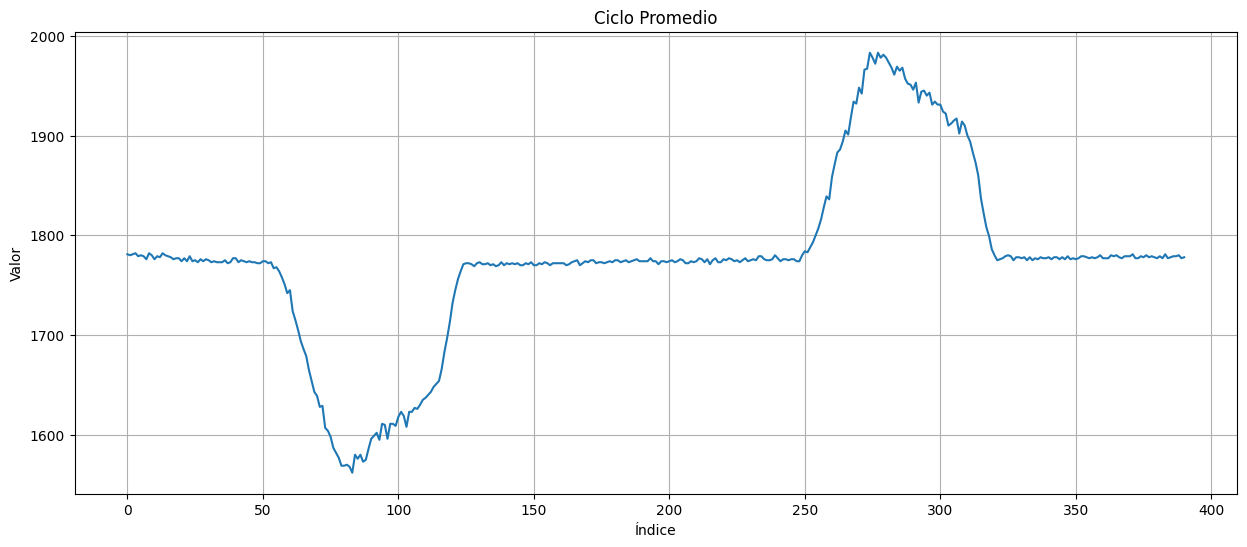

In [171]:
# Datos
array1 = [1781, 1780, 1781, 1782, 1779, 1780, 1779, 1776, 1782, 1780, 1776, 1779, 1778, 1782, 1780, 1779, 1778, 1776, 1777, 1777, 1774, 1777, 1774, 1779, 1774, 1775, 1773, 1776, 1774, 1776, 1775, 1773, 1774, 1773, 1773, 1773, 1775, 1772, 1773, 1777, 1777, 1773, 1775, 1774, 1773, 1774, 1773, 1773, 1772, 1772, 1774, 1774, 1772, 1773, 1767, 1768, 1764, 1758, 1751, 1742, 1745, 1724, 1715, 1705, 1694, 1686, 1679, 1665, 1654, 1643, 1639, 1628, 1629, 1607, 1604, 1598, 1587, 1582, 1577, 1569, 1569, 1570, 1568, 1562, 1580, 1576, 1580, 1573, 1575, 1586, 1596, 1599, 1602, 1595, 1611, 1610, 1596, 1611, 1611, 1609]
array2 = [1618, 1623, 1619, 1608, 1623, 1623, 1627, 1626, 1630, 1635, 1637, 1640, 1643, 1648, 1651, 1654, 1666, 1683, 1697, 1713, 1732, 1745, 1756, 1764, 1771, 1772, 1772, 1771, 1769, 1772, 1773, 1771, 1771, 1772, 1770, 1771, 1769, 1770, 1773, 1770, 1772, 1771, 1772, 1771, 1772, 1770, 1770, 1772, 1771, 1773, 1770, 1770, 1772, 1771, 1773, 1772, 1770, 1772, 1772, 1772, 1772, 1772, 1770, 1771, 1773, 1774, 1775, 1770, 1772, 1774, 1773, 1775, 1775, 1772, 1773, 1773, 1772, 1773, 1774, 1773, 1775, 1775, 1773, 1774, 1775, 1773, 1774, 1775, 1776, 1774, 1774, 1774, 1774, 1777, 1774, 1774, 1771, 1774, 1774, 1773]
array3 = [1774, 1775, 1773, 1774, 1776, 1775, 1772, 1772, 1774, 1773, 1774, 1777, 1776, 1773, 1776, 1771, 1775, 1777, 1773, 1773, 1776, 1775, 1777, 1776, 1774, 1775, 1773, 1775, 1777, 1774, 1775, 1776, 1775, 1779, 1779, 1776, 1775, 1775, 1776, 1780, 1777, 1774, 1776, 1776, 1775, 1776, 1776, 1774, 1774, 1780, 1784, 1783, 1788, 1793, 1800, 1807, 1816, 1828, 1839, 1836, 1858, 1871, 1883, 1886, 1894, 1905, 1901, 1918, 1934, 1932, 1948, 1942, 1966, 1967, 1983, 1978, 1972, 1983, 1978, 1981, 1978, 1973, 1968, 1961, 1969, 1965, 1968, 1957, 1952, 1951, 1946, 1953, 1933, 1944, 1945, 1940, 1943, 1931, 1934, 1931]
array4 = [1931, 1924, 1922, 1910, 1912, 1915, 1917, 1902, 1914, 1910, 1900, 1894, 1883, 1873, 1860, 1837, 1822, 1808, 1799, 1786, 1780, 1775, 1776, 1777, 1779, 1780, 1779, 1775, 1778, 1778, 1777, 1778, 1775, 1778, 1775, 1777, 1776, 1778, 1777, 1777, 1778, 1776, 1778, 1778, 1776, 1778, 1776, 1779, 1776, 1777, 1776, 1777, 1779, 1779, 1778, 1777, 1778, 1777, 1778, 1780, 1777, 1777, 1777, 1780, 1779, 1780, 1778, 1777, 1779, 1779, 1779, 1781, 1777, 1777, 1779, 1778, 1780, 1778, 1779, 1778, 1777, 1779, 1777, 1781, 1777, 1778, 1779, 1779, 1780, 1777, 1778]

# Concatena los arrays
ciclo_promedio = np.concatenate([array1, array2, array3, array4])

# Crea el gráfico
plt.figure(figsize=(15, 6))
plt.plot(ciclo_promedio)
plt.title('Ciclo Promedio')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

## Módulo de Firmware Signal Analyzer

Para verificar el correcto funcionamiento de este módulo, se va a replicar el procesamiento que hace el microcontrolador y se van a comparar ambos resultados.

### Prcedimiento específico
* Concatenar múltiples ciclos promedios
* Hacer una FFT con ventana Flat Top
* Obtener amplitud de la señal fundamental
* Obtener THD
* Obtener señal correctora

### Análisis con simulación en Python

#### Concatenación de múltiples ciclos

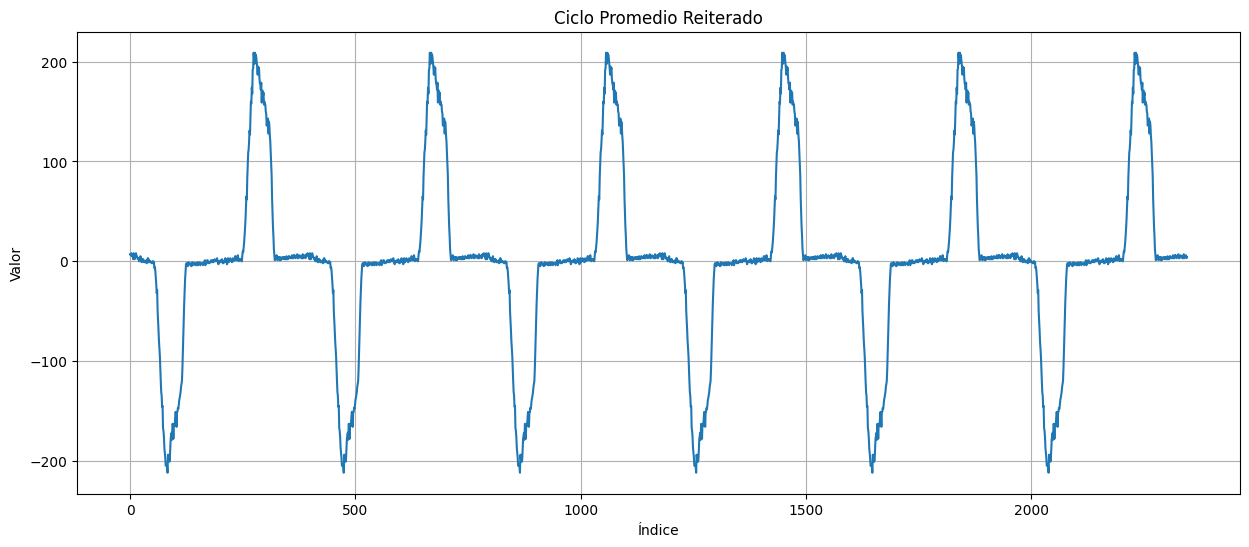

In [172]:
# Se genera el array basándose en el ciclo promedio
concatenated_array = np.concatenate([ciclo_promedio, ciclo_promedio, ciclo_promedio, ciclo_promedio, ciclo_promedio, ciclo_promedio])

# Restar offset
offset = 1774
concatenated_array = concatenated_array - offset

# Crea el gráfico
plt.figure(figsize=(15, 6))
plt.plot(concatenated_array)
plt.title('Ciclo Promedio Reiterado')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

#### Hacer una FFT con ventana Flat Top

En este caso que es una simulación no se aplica la ventana flat top ya que se está generando intencionalmente un vector con exactamente 5 ciclos (no tiene sentido usar una ventana)

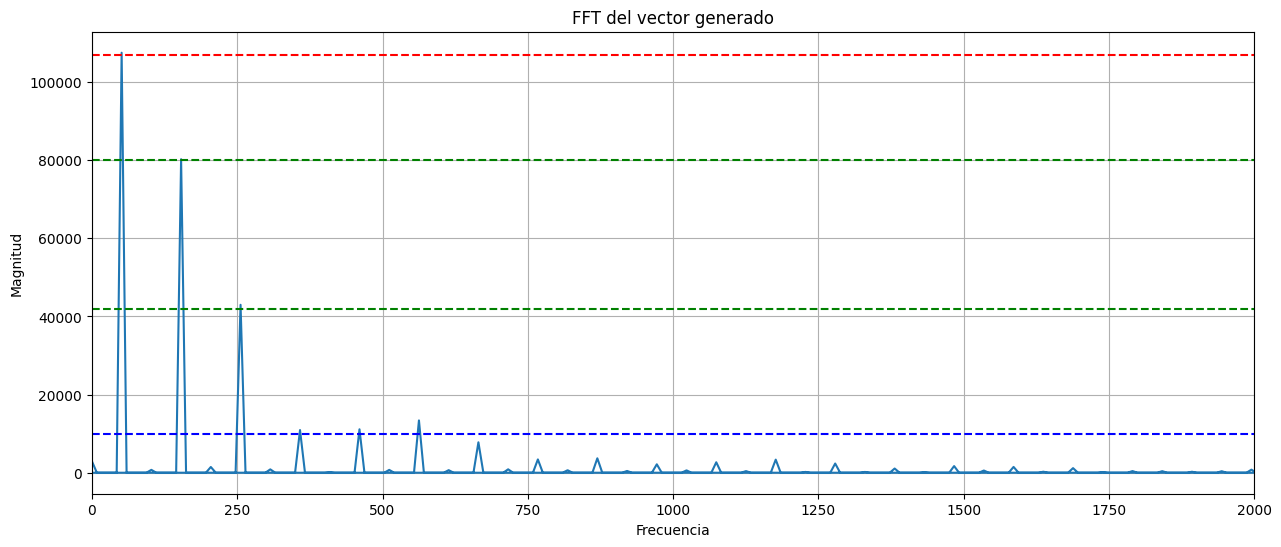

In [173]:
#Fs
fs = 20000

# Calcular la FFT
fft_vals = np.fft.fft(concatenated_array)

# Obtener las frecuencias correspondientes
n = len(concatenated_array)
freqs = np.fft.fftfreq(n,1/fs)

# Graficar la magnitud de la FFT
plt.figure(figsize=(15, 6))
plt.plot(freqs, np.abs(fft_vals))
plt.title('FFT del vector generado')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)

# Ajustar los límites del eje X
plt.xlim(0, 2000)

plt.axhline(y=107000, color='r', linestyle='--')
plt.axhline(y=80000, color='g', linestyle='--')
plt.axhline(y=42000, color='g', linestyle='--')
plt.axhline(y=10000, color='b', linestyle='--')

plt.show()


#### Cálculo del THD

In [174]:
# Encontrar picos en la FFT
fft_vals = np.abs(fft_vals)
peaks, _ = find_peaks(fft_vals)

# Filtrar picos válidos (evitar frecuencias negativas)
peaks = peaks[freqs[peaks] > 0]
peaks = peaks[fft_vals[peaks] > 10000]

# Obtener fundamental
fundamental = fft_vals[peaks[0]]

# Obtener potencia armonicos
har=0
first = 1
for h in peaks:
  if first==1:
    first = 0
    continue
  har +=  fft_vals[h]

# Calcular el THD
thd = 100* har / fundamental

thd

147.57254166107435

#### Gemerar señal Correctora

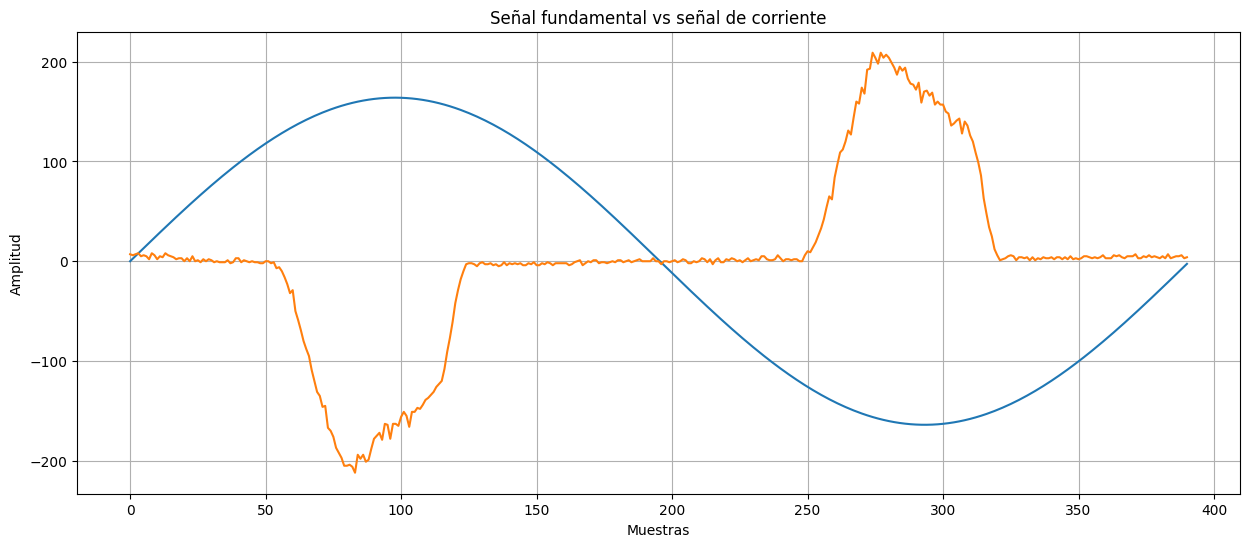

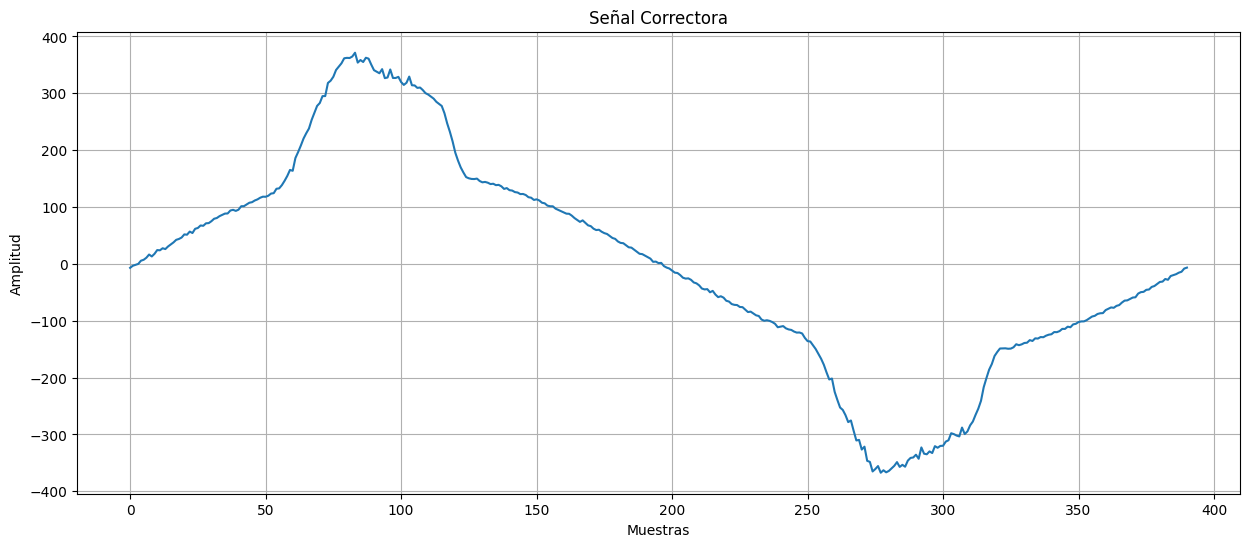

In [175]:
N = len(ciclo_promedio)
t = np.linspace(0, 2 * np.pi, N, endpoint=False)
fundamental = np.sqrt(fundamental)/2 * np.sin(t)

plt.figure(figsize=(15, 6))
plt.plot(fundamental)
plt.plot(ciclo_promedio-offset)
plt.title(f'Señal fundamental vs señal de corriente')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

sig_correctora = fundamental - ciclo_promedio + offset
plt.figure(figsize=(15, 6))
plt.plot(sig_correctora)
plt.title(f'Señal Correctora')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()



### Microcontrolador

#### FFT con ventana Flat Top

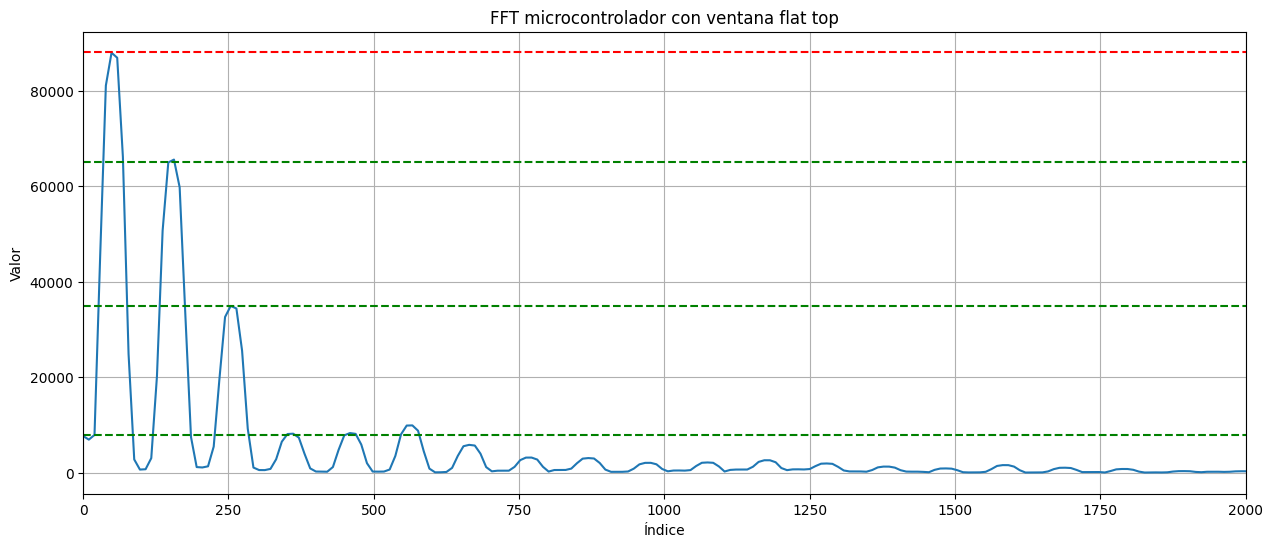

In [176]:
# Datos
array1 = [7673.17676, 6924.20459, 7909.02393, 45413.3047, 81022.1172, 87890.8516, 86836.6875, 66109.3828, 24839.7891, 2773.36743, 659.388733, 729.26239, 3047.71606, 20158.1836, 50659.8398, 64923.75, 65530.9844, 59733.2812, 33141.8438, 7464.53516, 1180.40076, 1100.92517, 1341.75146, 5462.66797, 19507.2988, 32589.5918, 34900.9258, 34367.2461, 25531.752, 9204.42969, 1080.81519, 557.593567, 548.393921, 800.443481, 2821.19751, 6499.13428, 8097.96387, 8169.68652, 7334.90576, 3962.87036, 905.561157, 254.147949, 231.090729, 211.152527, 1190.13245, 4778.52344, 7815.23047, 8300.91504, 8131.03564, 5890.03711, 1995.5083, 245.679153, 225.817902, 246.112076, 670.475525, 3516.74097, 8036.43408, 9869.25, 9903.6377, 8787.84766, 4513.54785, 857.193115, 81.4920807, 97.2779236, 159.302994, 1012.17053, 3519.90918, 5546.41846, 5832.5708, 5688.26758, 3983.15771, 1177.31921, 293.406769, 422.648926, 417.987335, 430.542328, 1223.35425, 2634.2793, 3164.19238, 3172.09326, 2753.62085, 1246.10681, 239.3508, 564.38916, 580.565674, 581.854309, 863.03772, 1992.36987, 2945.65845, 3068.57886, 2977.04614, 2044.76013, 653.934875, 185.789841, 194.056961, 191.499863, 259.304108, 848.214539, 1755.00537, 2063.75635]
array2 = [2068.86792, 1763.38525, 785.282471, 296.912933, 458.91568, 468.609589, 441.255585, 547.825806, 1408.56079, 2080.73584, 2148.86206, 2073.36035, 1316.08557, 256.504028, 589.683838, 662.334229, 663.546326, 671.069031, 1250.66138, 2266.02148, 2609.28955, 2605.08984, 2190.9104, 982.27948, 537.665405, 700.98114, 712.398315, 681.348755, 768.016541, 1375.56519, 1889.31885, 1936.56628, 1859.47278, 1228.09424, 468.820435, 272.099792, 271.092865, 265.334351, 213.963562, 560.810669, 1119.56079, 1282.172, 1275.8457, 1066.63342, 530.996338, 242.060425, 219.080444, 220.318909, 176.878738, 105.245659, 601.824524, 875.30072, 898.966614, 850.861511, 525.755493, 105.291374, 60.9986, 75.4584122, 77.5249329, 193.028687, 750.564514, 1417.18103, 1591.21265, 1583.8501, 1280.95886, 528.616821, 41.2687912, 50.9561806, 53.1629639, 69.0383606, 277.442566, 752.967102, 1027.12109, 1048.28247, 983.414124, 587.82489, 130.97261, 136.493835, 148.541611, 141.629623, 53.3394852, 350.861908, 702.987122, 780.621155, 776.551941, 612.037292, 234.466217, 40.7492256, 65.4823532, 68.7123108, 55.2015915, 86.0971832, 246.236847, 330.465179, 336.474976, 310.684631, 167.231659, 111.891747, 199.745911, 208.279922]
array3 = [204.957703, 173.429703, 201.347992, 285.456299, 309.086639, 305.378448, 245.766937, 142.626633, 129.919861, 139.133896, 140.929031, 123.46209, 147.184952, 319.42572, 415.964691, 418.962585, 387.983704, 228.495224, 115.631828, 131.684387, 137.41333, 126.764168, 20.4973507, 274.610413, 516.125183, 561.5979, 553.591309, 436.308014, 273.622345, 331.107758, 369.298096, 370.93277, 329.170013, 311.01178, 490.604218, 605.189209, 608.805908, 567.26355, 454.283356, 595.544983, 783.880798, 803.320679, 769.919495, 516.105835, 238.063232, 207.73233, 215.540619, 212.712006, 204.665482, 319.316742, 539.636414, 606.984802, 606.487305, 488.780182, 228.496796, 459.158264, 588.558411, 593.03595, 534.170288, 311.023743, 144.642029, 126.555206, 125.701843, 120.901291, 102.26738, 257.121399, 412.089935, 437.693085, 428.128784, 329.573578, 248.101151, 341.499115, 376.384888, 375.052368, 321.373352, 294.786652, 478.747284, 570.825195, 574.29364, 513.707886, 332.976868, 280.611694, 328.162415, 330.484589, 316.19455, 238.758392, 243.99852, 313.955505, 328.262665, 319.007996, 241.140945, 229.965591, 365.854279, 402.3591, 399.844452, 331.340942, 234.105057, 277.945892, 318.016418, 317.388519]
array4 = [279.887878, 165.133331, 143.850616, 173.879318, 175.334457, 168.229218, 160.80101, 276.187592, 395.003113, 409.720062, 397.951813, 278.84259, 176.419937, 251.809921, 271.727051, 271.463257, 238.521698, 263.046722, 398.374084, 458.824371, 457.293274, 393.849152, 205.366074, 176.806152, 219.294113, 222.248337, 211.766937, 210.667297, 335.531525, 459.793976, 473.305176, 455.684814, 287.524872, 80.2298203, 166.913513, 183.19725, 183.964935, 180.92337, 304.33844, 527.617065, 605.360291, 602.618896, 492.35318, 164.779007, 395.91394, 536.875854, 541.463989, 504.114929, 414.023773, 580.316833, 772.459534, 791.768921, 755.368042, 468.747589, 321.030029, 556.143005, 595.871582, 587.674072, 446.227936, 257.739838, 290.07782, 321.293335, 318.685883, 244.203857, 53.1073532, 336.770966, 440.539276, 443.16272, 402.568817, 277.621338, 333.113556, 434.786804, 443.007385, 416.417877, 202.770126, 192.968903, 407.98877, 435.291107, 425.9823, 282.768799, 145.394012, 353.524536, 403.681122, 401.313171, 305.394714, 14.2618799, 265.566132, 347.250214, 349.3078, 300.563873, 89.9513245, 165.222092, 264.853699, 271.519928, 253.898453, 150.444336, 32.9948845, 36.765728, 41.199295, 39.0166283]
array5 = [32.9352722, 52.4191246, 91.7331009, 100.487579, 100.649979, 92.2831573, 116.543861, 190.803772, 223.787964, 223.675339, 196.498566, 126.632362, 178.30188, 232.104553, 234.376205, 215.779785, 97.3037186, 139.376953, 244.475967, 254.778824, 246.591705, 151.139008, 180.517151, 353.651611, 387.611328, 384.142578, 293.479248, 145.015259, 234.088974, 276.159729, 277.402802, 238.620514, 136.318405, 85.8639145, 90.9176559, 90.0333252, 87.8684769, 91.6140747, 158.558014, 217.201447, 225.195053, 212.391953, 107.937531, 330.957581, 611.302063, 662.146423, 653.822144, 527.26825, 403.390686, 526.988953, 588.804932, 588.867859, 495.323395, 248.445206, 122.043816, 127.165855, 126.637856, 110.397972, 43.9666786, 219.95192, 330.677368, 340.378693, 320.333923, 133.812653, 242.558533, 494.803772, 532.741821, 522.895203, 386.832031, 573.821594, 1129.66516, 1286.71899, 1280.73206, 1038.99866, 354.026428, 187.197281, 317.707367, 320.590668, 275.136169, 67.3367767, 365.415253, 548.489014, 561.318909, 531.088806, 318.233582, 72.9325027, 118.577507, 128.537552, 126.942848, 105.596672, 110.456818, 156.877167, 173.101196, 171.343658, 135.057388, 49.1416473, 96.7810211, 123.194382, 123.708023, 117.262177]
array6 = [141.750397, 272.238098, 359.62323, 365.208466, 344.239349, 234.720444, 275.405396, 404.33429, 422.046326, 412.34668, 307.529419, 317.709045, 517.703125, 569.248596, 564.781006, 459.485352, 269.259033, 230.085892, 247.54837, 248.027634, 213.679718, 106.322449, 121.221008, 163.345749, 166.206985, 156.067154, 119.232643, 123.078239, 156.412582, 161.110825, 155.441528, 92.2437973, 104.298706, 210.435211, 231.485565, 228.552277, 172.47522, 71.5019073, 129.601395, 155.069672, 155.501694, 127.425728, 26.8305626, 90.6954193, 129.944351, 132.255112, 121.480522, 79.7545013, 75.9522095, 100.400764, 103.416382, 99.0016556, 68.6522675, 142.552505, 248.612183, 267.456604, 263.649902, 176.297516, 60.5730553, 250.253555, 296.925201, 297.173126, 247.506897, 124.951485, 154.367966, 195.361557, 197.388443, 168.894562, 61.6630783, 346.253815, 520.114319, 535.134949, 508.498383, 298.00119, 65.4425812, 208.229065, 228.170975, 222.865723, 131.336853, 141.682785, 372.87323, 428.807068, 427.53537, 338.724701, 89.919754, 218.424789, 292.686371, 295.637024, 256.229248, 76.697113, 190.539948, 299.099365, 307.694031, 290.48233, 188.317474, 96.8091125, 111.229599, 115.569244, 112.574081, 59.1007309]
array7 = [112.030174, 251.766632, 283.812256, 282.336945, 230.405624, 125.629158, 120.313416, 137.134735, 138.242859, 122.44294, 138.567001, 340.364258, 460.408325, 468.766113, 440.390656, 287.280884, 152.664841, 142.919708, 144.634735, 142.757843, 122.469536, 175.847198, 280.534576, 307.933044, 304.711914, 245.502838, 135.596725, 130.807053, 146.514267, 146.904358, 124.486443, 42.6238861, 47.8846359, 76.6219254, 78.2160339, 70.015274, 37.888176, 149.358704, 233.566238, 243.816254, 234.389297, 147.897217, 103.845001, 208.356293, 229.074448, 226.267288, 166.586487, 28.2944145, 89.2185593, 113.609543, 113.4879, 97.8101578, 120.080147, 287.637054, 371.048584, 375.595062, 342.239655, 181.628021, 36.8663254, 76.4852219, 81.0268784, 78.688652, 81.2889786, 177.480255, 288.341187, 309.82309, 305.10614, 227.847763, 80.5333023, 48.5159035, 58.6422844, 58.0762939, 59.0318947, 98.5868988, 195.818146, 242.751602, 245.12822, 221.43222, 132.725891, 151.197891, 209.90358, 215.507889, 203.797531, 107.996529, 66.6659164, 161.038589, 173.95517, 170.541962, 124.668373, 249.269302, 498.486328, 564.60376, 563.362671, 464.934021, 245.037598, 218.195206, 255.245956, 255.873764, 216.507614, 109.476227]
array8 = [461.91687, 665.12323, 680.416748, 642.742249, 401.81665, 124.758446, 57.5423126, 55.7661514, 54.2911797, 24.1171513, 150.895828, 303.696899, 339.204865, 338.097687, 279.038574, 177.369492, 188.762939, 215.091232, 215.322617, 183.621719, 135.470963, 392.173035, 539.299255, 549.449158, 517.316284, 362.563416, 285.201965, 339.220032, 349.375488, 340.07254, 217.378479, 51.856266, 173.192001, 196.076202, 195.542465, 158.310928, 106.203087, 127.619545, 146.917313, 145.995605, 128.382812, 83.8985214, 125.023979, 161.442841, 163.395737, 156.046097, 148.349228, 234.42627, 325.973083, 336.819305, 325.894409, 215.590073, 87.2089005, 132.467499, 144.277985, 144.11412, 122.114166, 145.070801, 246.491943, 285.396851, 284.172211, 227.478088, 73.6414337, 339.581299, 458.489868, 463.50415, 418.99762, 181.906555, 135.499283, 270.105255, 281.178986, 267.306519, 133.615067, 190.541, 388.762268, 421.768036, 414.81189, 299.456055, 200.714798, 418.933319, 487.297607, 485.020111, 392.148285, 86.5284119, 209.305359, 300.341522, 302.526794, 280.800781, 221.571655, 263.360077, 331.917572, 339.844147, 319.879028, 161.195557, 173.339996, 356.132843, 382.93988, 375.370911, 297.886566, 611.322937]
array9 = [1177.23438, 1331.60583, 1325.32336, 1072.01477, 392.883484, 159.950836, 264.220947, 266.612701, 230.782059, 82.7796402, 236.766922, 352.916748, 360.442596, 340.821075, 211.392075, 101.873604, 133.164627, 140.100494, 136.939255, 97.6601028, 68.8282547, 114.794914, 128.720688, 126.699715, 80.6861572, 98.1064301, 310.841949, 383.791412, 384.484894, 332.399994, 133.606232, 180.020294, 268.727386, 273.858032, 256.699951, 165.79982, 142.299744, 198.529907, 206.3909, 199.708298, 111.717773, 138.31189, 306.583008, 339.503235, 338.170624, 291.860413, 284.270081, 411.83075, 474.611267, 474.249115, 407.40976, 196.516632, 223.206299, 300.58844, 305.031952, 288.862274, 255.974487, 374.795532, 515.155273, 531.749084, 514.613342, 347.445496, 125.317322, 92.050293, 97.3162003, 97.3823166, 102.028473, 225.541962, 429.94162, 499.374359, 498.100922, 410.180084, 100.821671, 230.210663, 336.749237, 340.619202, 310.440704, 169.412979, 150.582169, 225.414658, 232.199448, 223.605026, 150.415466, 63.6872749, 39.0799942, 39.1640892, 37.2324638, 15.573679, 121.52787, 260.138519, 300.140137, 298.512238, 235.194092, 37.2624435, 246.195587, 330.781067, 333.080078, 295.417572, 110.732758, 159.847168]
array10 = [267.366425, 275.26709, 260.053375, 136.49762, 136.369751, 271.733917, 291.1474, 286.94696, 238.647217, 230.833954, 318.500824, 351.036682, 349.60675, 283.523651, 174.6745, 319.835938, 396.123901, 397.65036, 353.726166, 185.679077, 101.600883, 132.377121, 134.622421, 130.565598, 124.351906, 192.801147, 275.558319, 288.961517, 282.797699, 222.481567, 246.880096, 399.225159, 440.407837, 438.417145, 362.394043, 241.204956, 274.5047, 314.117065, 314.566925, 286.723999, 242.285034, 329.770966, 413.145081, 418.702911, 392.356354, 249.974319, 155.930893, 187.071899, 194.157501, 188.130325, 132.816025, 130.442215, 225.199371, 246.629013, 245.50383, 213.10759, 210.585068, 303.099854, 348.024567, 348.095825, 309.325226, 279.494873, 513.256531, 661.683716, 669.068237, 619.527405, 370.980957, 164.480667, 164.011398, 167.984879, 165.583084, 177.235336, 327.836243, 519.695312, 559.935486, 554.645996, 447.169708, 303.02774, 317.6745, 347.993683, 347.281097, 313.460144, 296.668152, 451.27124, 553.570862, 558.486572, 512.396606, 321.936249, 233.620911, 280.124756, 286.53714, 278.948303, 250.265091, 343.218903, 497.866364, 529.445496, 522.402588, 412.965637, 277.768036, 299.668579]
array11 = [326.456909, 325.378326, 280.993408, 207.369919, 257.791901, 304.660278, 306.828613, 279.85788, 189.960831, 157.699127, 181.221039, 183.716629, 173.910004, 97.9586487, 164.716217, 287.211853, 305.980743, 299.474945, 205.852982, 119.586624, 261.602478, 298.264069, 297.821594, 251.062607, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Concatena los arrays
fft_uc = np.concatenate([array1, array2, array3, array4, array6, array7, array8, array9, array10, array11 ])
factor_correccion = 0.999514163
fft_uc /= factor_correccion

#Genero eje frecuencias
n = len(fft_uc)
freqs = np.linspace(0, fs/2, 1024, endpoint=False)

# Crea el gráfico
plt.figure(figsize=(15, 6))
plt.plot(freqs, fft_uc)
plt.title('FFT microcontrolador con ventana flat top')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.xlim(0, 2000)
plt.axhline(y=88000, color='r', linestyle='--')
plt.axhline(y=65000, color='g', linestyle='--')
plt.axhline(y=35000, color='g', linestyle='--')
plt.axhline(y=8000, color='g', linestyle='--')

plt.show()


#### THD

El microcontrolador calcula THD = 150%

### Señal Correctora

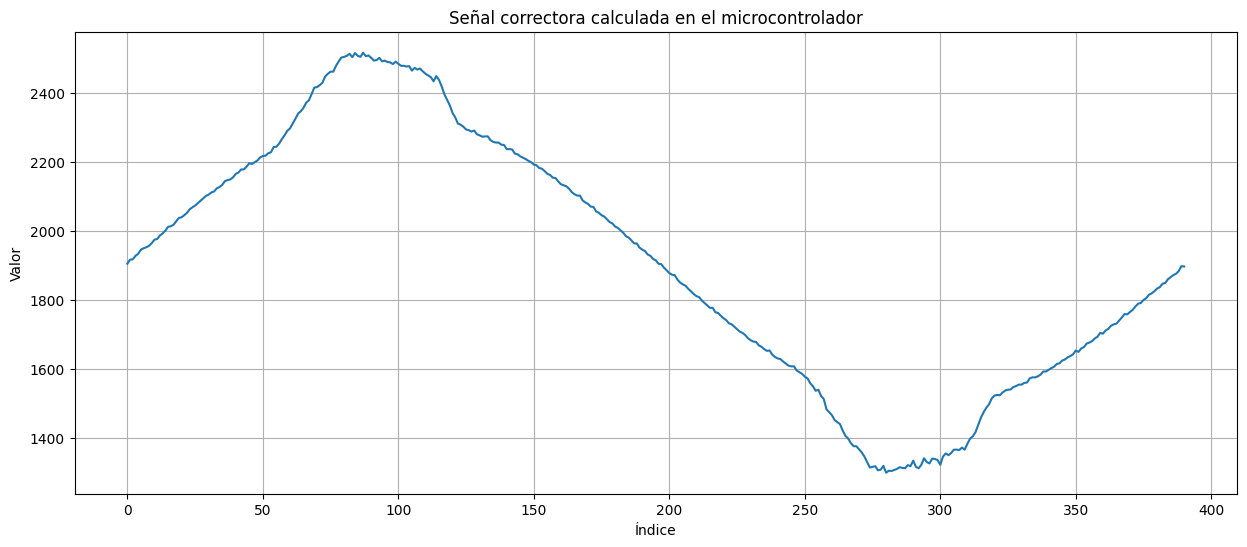

In [177]:
# Datos
array1 = [1905, 1917, 1918, 1928, 1934, 1946, 1950, 1953, 1957, 1965, 1975, 1977, 1987, 1993, 2001, 2012, 2014, 2018, 2028, 2038, 2040, 2046, 2053, 2063, 2069, 2074, 2081, 2088, 2095, 2102, 2106, 2112, 2115, 2124, 2128, 2134, 2145, 2148, 2150, 2156, 2166, 2170, 2179, 2179, 2187, 2197, 2195, 2200, 2205, 2214, 2218, 2219, 2226, 2229, 2244, 2245, 2254, 2267, 2278, 2291, 2298, 2312, 2326, 2341, 2348, 2358, 2373, 2380, 2398, 2417, 2418, 2424, 2431, 2449, 2457, 2463, 2463, 2480, 2493, 2504, 2506, 2509, 2515, 2505, 2517, 2509, 2506, 2518, 2508, 2510, 2503, 2495, 2497, 2503, 2493, 2495, 2491, 2490, 2485, 2492]
array2 = [2486, 2480, 2480, 2478, 2479, 2466, 2474, 2469, 2472, 2464, 2457, 2452, 2447, 2435, 2450, 2439, 2420, 2397, 2381, 2365, 2343, 2330, 2312, 2309, 2303, 2295, 2293, 2289, 2292, 2281, 2278, 2274, 2275, 2275, 2264, 2259, 2257, 2257, 2251, 2250, 2238, 2238, 2237, 2225, 2223, 2217, 2213, 2209, 2204, 2200, 2193, 2191, 2183, 2181, 2174, 2166, 2163, 2155, 2154, 2144, 2136, 2133, 2130, 2123, 2113, 2107, 2103, 2103, 2089, 2083, 2079, 2071, 2070, 2057, 2053, 2046, 2042, 2034, 2026, 2022, 2013, 2009, 2002, 1995, 1985, 1981, 1973, 1964, 1964, 1952, 1946, 1942, 1932, 1928, 1919, 1915, 1905, 1904, 1894, 1886]
array3 = [1878, 1873, 1872, 1859, 1850, 1845, 1841, 1832, 1825, 1817, 1811, 1808, 1798, 1791, 1784, 1777, 1777, 1764, 1762, 1754, 1747, 1741, 1732, 1729, 1722, 1715, 1708, 1704, 1698, 1689, 1683, 1679, 1678, 1668, 1664, 1657, 1652, 1653, 1641, 1634, 1630, 1628, 1621, 1615, 1609, 1607, 1607, 1595, 1590, 1585, 1577, 1572, 1558, 1549, 1536, 1539, 1521, 1512, 1482, 1474, 1465, 1451, 1445, 1439, 1420, 1405, 1397, 1384, 1375, 1375, 1366, 1357, 1345, 1329, 1313, 1315, 1317, 1305, 1307, 1318, 1298, 1304, 1303, 1306, 1309, 1314, 1312, 1311, 1320, 1317, 1333, 1315, 1311, 1321, 1340, 1329, 1325, 1339, 1338, 1335]
array4 = [1321, 1345, 1354, 1349, 1355, 1365, 1365, 1364, 1371, 1365, 1382, 1397, 1404, 1416, 1437, 1458, 1474, 1487, 1497, 1514, 1522, 1524, 1523, 1531, 1537, 1539, 1540, 1547, 1550, 1554, 1554, 1559, 1560, 1572, 1575, 1575, 1578, 1583, 1592, 1592, 1597, 1602, 1606, 1614, 1616, 1624, 1627, 1633, 1637, 1642, 1653, 1649, 1659, 1663, 1673, 1676, 1680, 1688, 1693, 1704, 1702, 1711, 1716, 1725, 1729, 1731, 1740, 1749, 1759, 1758, 1765, 1771, 1781, 1789, 1791, 1800, 1805, 1815, 1819, 1825, 1833, 1837, 1847, 1849, 1860, 1866, 1872, 1876, 1884, 1898, 1897]

# Concatena los arrays
sig_correctora = np.concatenate([array1, array2, array3, array4])

# Crea el gráfico
plt.figure(figsize=(15, 6))
plt.plot(sig_correctora)
plt.title('Señal correctora calculada en el microcontrolador')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

#### Verificación de la señal que qeuda al sumar ambas señales

Como se puede ver queda una senoidal pura

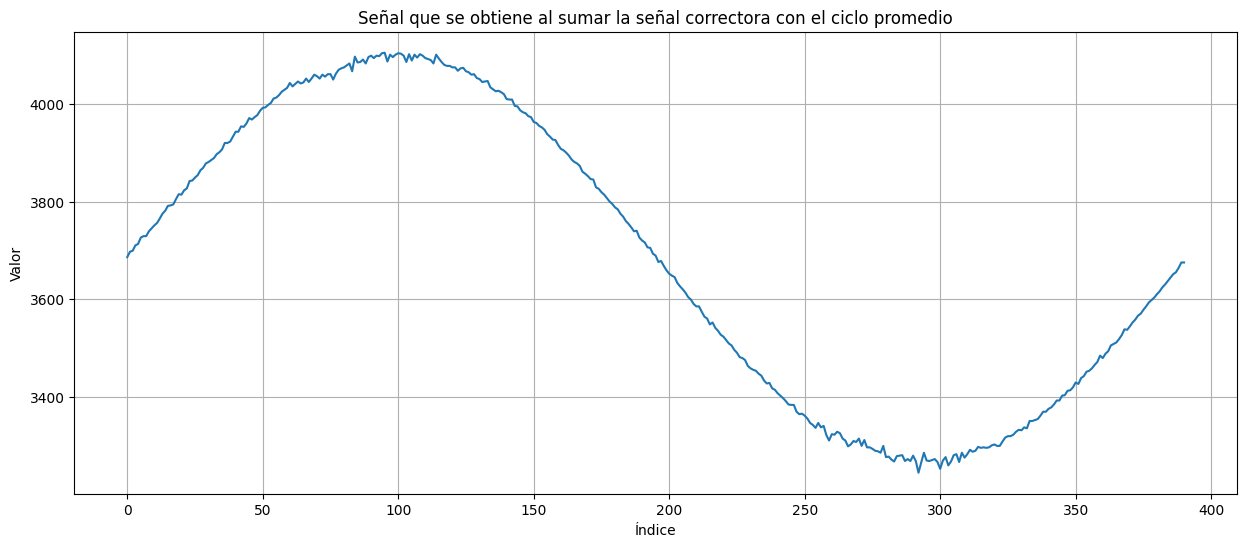

In [178]:
# Concatena los arrays
i_linea = sig_correctora + ciclo_promedio

# Crea el gráfico
plt.figure(figsize=(15, 6))
plt.plot(i_linea)
plt.title('Señal que se obtiene al sumar la señal correctora con el ciclo promedio')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

## Conclusión

Si bien los resultados no son exactamente iguales, el microcontrolador obtiene un resultado muy similar calculado con Python